# Chapter Goals
- Interpreting and inferring conclusions from knowledge representations.

# General Guidelines
- Tinkering with examples by tuning their code, Gaining more familiarity and intuition.
- Visualizing output representations.

---

# Modules & Datasets Setup

In [ ]:
# @title
!apt-get install default-jdk
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jdk is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
# @title
!pip install pygraphviz
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install sklearn-weka-plugin

  Using cached sklearn-weka-plugin-0.0.7.tar.gz (69 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn-weka-plugin: filename=sklearn_weka_plugin-0.0.7-py3-none-any.whl size=27346 sha256=ed945d48776e18a13f7f84af265164b3d578685a74a80126648edffb1981ef9c
  Stored in directory: /root/.cache/pip/wheels/51/6d/e5/458ea9a1be729f39ed4cf14aab2f87eb5147047b690402605b
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2952 sha256=b540221fcd6bd5137c2cc05e390e687f268713d1df3f66020e66bcb15c78387d
  Stored in directory: /root/.cache/pip/wheels/33/a3/d2/092b519e9522b4c91608b7dcec0dd9051fa1bff4c45f4502d1
Successfully built sklearn-weka-plugin sklearn


In [ ]:
# @title
#Restart runtime after installing the dependencies

In [ ]:
# @title
import os
import glob
import numpy as np
import pandas as pd
import weka.core.jvm as jvm
from weka.core import converters
import matplotlib.pyplot as plt

In [ ]:
# @title
data_dir = 'data'

In [ ]:
# @title
#!rm -r weka
#!rm -r data

In [ ]:
# @title
#jvm.stop()
jvm.start(packages=True)

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [ ]:
# @title
# Preparing Datasets
if not os.path.exists(data_dir):
    !mkdir $data_dir
    for file in ['airline.arff', 'breast-cancer.arff', 'contact-lenses.arff', 'cpu.arff', 'cpu.with.vendor.arff', 'credit-g.arff', 'diabetes.arff', 'glass.arff', 'hypothyroid.arff', 'ionosphere.arff', 'iris.2D.arff', 'iris.arff', 'labor.arff', 'segment-challenge.arff', 'segment-test.arff', 'soybean.arff', 'supermarket.arff', 'unbalanced.arff', 'vote.arff', 'weather.nominal.arff', 'weather.numeric.arff',]:
        url = 'https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/' + file
        !wget -P $data_dir $url
    loader = converters.Loader(classname="weka.core.converters.ArffLoader")
    saver = converters.Saver(classname="weka.core.converters.CSVSaver")
    for file in glob.glob(os.path.join(data_dir, '*.arff')):
        dataset = loader.load_file(file)
        filename, file_extension = os.path.splitext(file)
        saver.save_file(dataset, filename + '.csv')
    !wget -P $data_dir https://raw.githubusercontent.com/Rytuo/ITMO-CT/master/Others/AdvancedML/data/OpenML/data/1438.arff
    !rm -r weka

# 3.1 Tables

In [ ]:
# Weather dataset
fileName = "weather.numeric.csv"
df = pd.read_csv(f"data/{fileName}")

df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [ ]:
# display only rows with sunny outlook
df[ df["outlook"]=="sunny" ]

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
10,sunny,75,70,True,yes


**Task 3.1.1** Today's outlook is sunny, temp is 85, humidity is 85, and not windy. Based on the decision table. Shoud we play?

**Answer.**

**Task 3.1.2** Today's outlook is sunny, temp is 85, humidity is 85, and windy. Should we play?

**Answer.**

**Task 3.1.3** Think of a scenario where that knowledge representation is useful.

**Answer.**

**Task 3.1.4** display the dataframe but with temperature at least 80.

**Challenge 3.1.5** Pick-up a dataset, Design a metric, and accordingly select a subset of the data as a decision table, and evaluate its performance.

# 3.2 Linear Models

In [ ]:
# CPU dataset
fileName = "cpu.csv"
df = pd.read_csv(f"data/{fileName}")

df

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


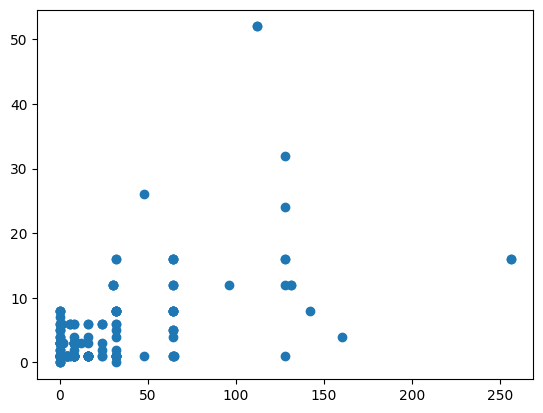

In [ ]:
# Scatter Plot
plt.scatter(df["CACH"], df["CHMIN"])

In [ ]:
# Linear model visualized

# Define the linear equation: y = mx + b
m = 2.47  # Slope
b = 37.06  # Y-intercept

# Generate x-values and y-values using the equation
x_values = np.linspace(0, 250, 100)  # Adjust the range and number of points as needed
y_values = (m * x_values) + b

# Plot the scatter and line
plt.plot(x_values, y_values, color="red")

NameError: ignored

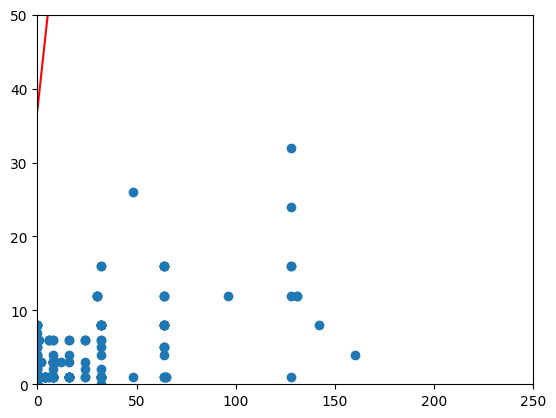

In [ ]:
# Both scatter and linear model on the same plot

# Define the linear equation: y = mx + b
m = 2.47  # Slope
b = 37.06  # Y-intercept

# Generate x-values and y-values using the equation
x_values = np.linspace(0, 250, 100)  # Adjust the range and number of points as needed
y_values = (m * x_values) + b

# Plot the scatter and line
plt.xlim(0, 250)  # Set the x-axis range
plt.ylim(0, 50)  # Set the y-axis range

plt.plot(x_values, y_values, color="red")
plt.scatter(df["CACH"], df["CHMIN"])

**Task 3.2.1** From the scatter, How are `CACH` and `CHMIN` correlated? Is the correlation strong?

**Answer**

**Task 3.2.2** Is the linear model well-fitting? Do you think it is reliable to predict by it?

**Answer**

**Task 3.2.3** Visualize a different linear model where y-column is negatively correlated with x-column.

**Task 3.2.4** The scatter plot ignores data density. How can we tinker with data to learn about the dense part?

**Challenge 3.2.4** Is it possible for a linear model to have more than two variables. How can we visualize it? Demonstrate on a simple dataset.

**Challenge 3.2.5** Suggest an alternative visualization method to detect density, apply it on the given data, and infer the new information not in the scatter plot.

# 3.3 Trees

In [ ]:
# Iris dataset
fileName = "iris.csv"
df = pd.read_csv(f"data/{fileName}")

df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


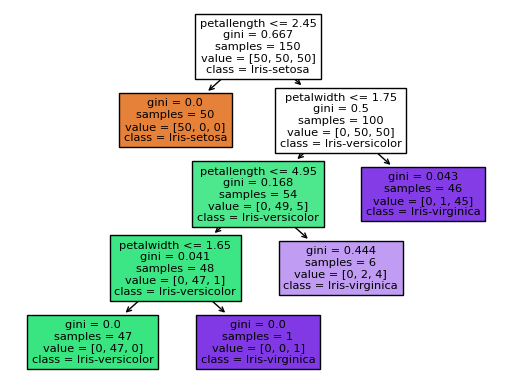

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

features_names = list( df.columns ); features_names.remove("class")

# Construction
clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=5)
clf.fit(
    df[ ["sepallength","sepalwidth","petallength","petalwidth"] ],
    df["class"]
  )

# Visualize
tree.plot_tree(clf, filled=True, feature_names=features_names, class_names=df["class"].unique() )
plt.show()

In [ ]:
#from weka.classifiers import Classifier

#data = loader.load_file("data/iris.arff")

#cls = Classifier(classname="weka.classifiers.trees.J48", options=["-C", "0.3"])
#cls.build_classifier(data)

#print(cls)

#import weka.plot.graph as graph  # NB: pygraphviz and PIL are required
#graph.plot_dot_graph(cls.graph)

**Task 3.3.1** What is the feature most effective to decide a class?

**Answer**

**Task 3.3.2** What do you infer from a tree whose number of leafs is too large or too small?

**Answer**

**Task 3.3.3** Select a partition of rows so that the generated decision tree has only two leafs with one decision node. Visualize to demonstrate.

**Challenge 3.3.4** Suggest an approach to reduce the depth of the tree and apply it.

# 3.4 Rules

## Classification

In [ ]:
# Classifying whether a student is a good one according to logical rules.
def isGoodStudent(highGPA, extraActivities, healthyFood):
  if highGPA and healthyFood:
    print("YES")
  if extraActivities:
    print("YES")

isGoodStudent(highGPA=True, extraActivities=True, healthyFood=False)

YES


**Task 3.4.1** According to the above classifier, Classify whether a student who eats healthy-food and does extra-activities is good.

**Task 3.4.2** Modify the classifier so that it prints a unique output, including "NO" in case none of the two conditions are satisfied.

**Task 3.4.3** Write an equivalent XOR function with exactly one conditional statement. Try all possible inputs to show both functions are logically equivalent.

In [ ]:
# returns 1 only if exactly one of x or y equals 1
def myXOR(x, y):
  if x==1 and y==0:
    return 1
  if x==0 and y==1:
    return 1
  if x==0 and y==0:
    return 0
  if x==1 and y==1:
    return 1

In [ ]:
# Answer

**Challenge 3.4.4** Research good qualities in symbolic AI not found in modern machine learning. Formulate scenarios where these qualitities are mandatory.

## Rules with Exceptions

**Task 3.4.5** Create a new attribute for `isGoodStudent`, and through it create a new _EXCEPTION_ rule. Modify the code to accommodate it.

## Association

**Task 3.4.6**

Rename _class_ column in _iris_ dataset to an attribute name of your choice. Guess the output of association.

In [ ]:
# Weather dataset
fileName = "weather.nominal.csv"
df = pd.read_csv(f"data/{fileName}")

df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


**Task 3.4.7** What is the _coverage_ and _accuracy_ of the rule `IF outlook == sunny THEN temperature == hot`? Compute it by code

Recall.
- _Coverage:_ Number of instances for which the rule applies.
- _Accuracy:_ Ratio of correct instances out of instances for which the antecedent (premise) applies.

**Task 3.4.8** For _rule 1_ and _rule 2_ below, Select a relationship (equality, less than, greater or equal, ..etc) between them, in regards to _coverage_ and _accuracy_. You can compute and display dataframes subsets to guess the answer.

- _Rule 1:_ `IF windy == false and play == no THEN outlook == sunny and humidity == high`
- _Rule 2:_ `IF humidity == high and windy == false and play == no THEN outlook == sunny`

**Challenge 3.4.9** What kind of useful decision can we take out of association?

**Challenge 3.4.10** Is associativity equivalent to causality?

## More Expressive Rules

In [ ]:
# Shapes
df = pd.DataFrame({
    "Width": [2,3,4,7,7],
    "Height": [4, 6, 3, 8, 6],
    "Sides": [4, 4, 4, 3, 3],
    "class": ["Standing", "Standing", "Lying", "Standing", "Lying"]
})

df

,Width,Height,Sides,class
0,2,4,4,Standing
1,3,6,4,Standing
2,4,3,4,Lying
3,7,8,3,Standing
4,7,6,3,Lying


**Task 3.4.11** Think with geometry. How can we learn about the _class_ given the features?

**Answer**

**Task 3.4.12** Are the given numeric features representable of your thoughts?

**Answer**

**Task 3.4.13** Engineer new features, reflecting your ideas.

**Challenge 3.4.14** Demonstrate with interpretable models, That the model quality out of the new engineered features is better than the given ones.

# 3.5 Instance-based Representation

<Axes: xlabel='Width', ylabel='Height'>

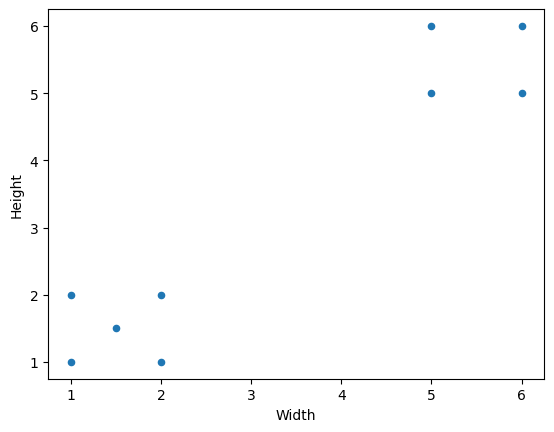

In [ ]:
df = pd.DataFrame( {
    "Width": [1, 1, 2, 2, 1.5,     5, 5, 6, 6],
    "Height": [1, 2, 1, 2, 1.5,    5, 6, 5, 6]
} )

df.plot.scatter(x = "Width", y = "Height")

**Task 3.5.1** Select some representative instances of multiple groups, whereby instances in each group are similar. Modify the dataset so that it memorizes only those representative instances. Give a corresponding class to each.

**Task 3.5.2** Given input `(Height = 1, Width =1)`, which example is it closest to? Accordingly how would you classify it?

**Challenge 3.5.3** Research a criteria by which we can select a subset of dataset. Think of a scenario in which the illustrated memorization method is useful.

# 3.6 Clusters

In [ ]:
# Create a dataframe with hardcoded numbers
df = pd.DataFrame({
    "x": [1, 2, 3, 4,     7, 8, 9, 10],
    "y": [10, 9, 8, 7,    4, 3, 2, 1],
    "class": [0, 0, 0, 0,   1, 1, 1, 1]
})

df

,x,y,class
0,1,10,0
1,2,9,0
2,3,8,0
3,4,7,0
4,7,4,1
5,8,3,1
6,9,2,1
7,10,1,1


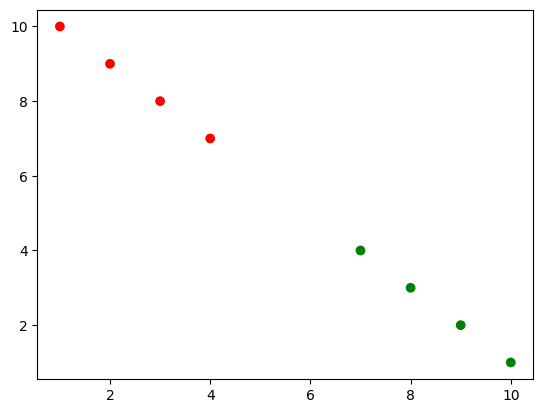

In [ ]:
plt.scatter(
    df["x"],
    df["y"],
    c=df["class"].apply(lambda x: "red" if x == 0 else "green" if x == 1 else "blue")
  )

**Task 3.6.1** How many clusters do we have? Which class corresponds to which colour? Guess a key feature in each cluster

**Task 3.6.2** Design a classification rule, which recomputes the classes given the _x_ and _y_.

**Task 3.6.3** Given input `(x = 2, y = 6)`, following your classification, which class does it belong it? Is the new visualization considering the new input reasonable?


**Challenge 3.6.4** Research different visualizations of clusters.

# Project. Phase 3
- Explore and analyze knowledge representations and whether they suit your use-case.
- Association mining.